Found 10233 images belonging to 3 classes.
Found 1200 images belonging to 3 classes.
Epoch 1/50
3411/3411 [==============================] - 453s 133ms/step - loss: 0.6682 - acc: 0.7224 - val_loss: 0.5334 - val_acc: 0.7983
Epoch 2/50
3411/3411 [==============================] - 438s 128ms/step - loss: 0.5161 - acc: 0.7967 - val_loss: 0.4651 - val_acc: 0.8292
Epoch 3/50
3411/3411 [==============================] - 429s 126ms/step - loss: 0.4293 - acc: 0.8285 - val_loss: 0.4960 - val_acc: 0.8258
Epoch 4/50
3411/3411 [==============================] - 419s 123ms/step - loss: 0.3489 - acc: 0.8616 - val_loss: 0.5642 - val_acc: 0.8025
Epoch 5/50
3411/3411 [==============================] - 425s 125ms/step - loss: 0.2688 - acc: 0.8915 - val_loss: 0.5828 - val_acc: 0.8192
Epoch 6/50
3411/3411 [==============================] - 434s 127ms/step - loss: 0.2006 - acc: 0.9207 - val_loss: 0.7450 - val_acc: 0.7817
Epoch 7/50
3411/3411 [==============================] - 435s 128ms/step - loss: 0.1413 

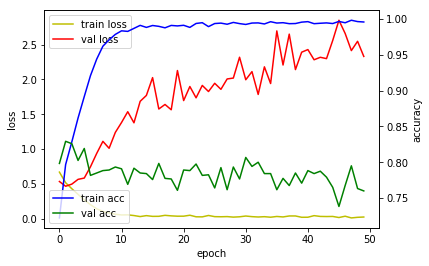

In [5]:
#실제 테스트 은하 분류, 50에포크, 실험데이터 1272개 ***

#0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

#랜덤시드 고정시키기
np.random.seed(3)

#1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'warehouse/final_galaxy2/train_galaxy',
        target_size=(50,50),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'warehouse/final_galaxy2/test_galaxy',
        target_size=(50,50),
        batch_size=3,
        shuffle=False,
        class_mode='categorical')

#2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=(50,50,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

#3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#4. 모델 학습시키기
hist=model.fit_generator(
        train_generator,
        steps_per_epoch=3411, 
        epochs=50,
        validation_data=test_generator,
        validation_steps=400)  

#5. 모델 평가하기
print("--Evaluate--")
scores = model.evaluate_generator(test_generator, steps=400)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#6. 모델 사용하기
print("-- Predict --")
output = model.predict_generator(test_generator, steps=400)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)
print()
print('\n'.join(test_generator.filenames))

#7. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

Found 10233 images belonging to 3 classes.
Found 1200 images belonging to 3 classes.
Epoch 1/100
3411/3411 [==============================] - 423s 124ms/step - loss: 0.6650 - acc: 0.7252 - val_loss: 0.6433 - val_acc: 0.7408
Epoch 2/100
3411/3411 [==============================] - 419s 123ms/step - loss: 0.5292 - acc: 0.7890 - val_loss: 0.4734 - val_acc: 0.8125
Epoch 3/100
3411/3411 [==============================] - 423s 124ms/step - loss: 0.4385 - acc: 0.8263 - val_loss: 0.5185 - val_acc: 0.8033
Epoch 4/100
3411/3411 [==============================] - 415s 122ms/step - loss: 0.3546 - acc: 0.8587 - val_loss: 0.6177 - val_acc: 0.7875
Epoch 5/100
3411/3411 [==============================] - 416s 122ms/step - loss: 0.2689 - acc: 0.8914 - val_loss: 0.7724 - val_acc: 0.7750
Epoch 6/100
3411/3411 [==============================] - 418s 122ms/step - loss: 0.1792 - acc: 0.9291 - val_loss: 0.8631 - val_acc: 0.7933
Epoch 7/100
3411/3411 [==============================] - 418s 123ms/step - loss: 

Epoch 59/100
3411/3411 [==============================] - 395s 116ms/step - loss: 0.0443 - acc: 0.9951 - val_loss: 2.9912 - val_acc: 0.7417
Epoch 60/100
3411/3411 [==============================] - 395s 116ms/step - loss: 0.0565 - acc: 0.9927 - val_loss: 3.1869 - val_acc: 0.7583
Epoch 61/100
3411/3411 [==============================] - 396s 116ms/step - loss: 0.0205 - acc: 0.9970 - val_loss: 2.9922 - val_acc: 0.7642
Epoch 62/100
3411/3411 [==============================] - 394s 116ms/step - loss: 0.0473 - acc: 0.9947 - val_loss: 3.0711 - val_acc: 0.7500
Epoch 63/100
3411/3411 [==============================] - 399s 117ms/step - loss: 0.0345 - acc: 0.9953 - val_loss: 3.1893 - val_acc: 0.7400
Epoch 64/100
3411/3411 [==============================] - 395s 116ms/step - loss: 0.0338 - acc: 0.9958 - val_loss: 2.7074 - val_acc: 0.7800
Epoch 65/100
3411/3411 [==============================] - 398s 117ms/step - loss: 0.0502 - acc: 0.9947 - val_loss: 3.4354 - val_acc: 0.7575
Epoch 66/100
3411/34

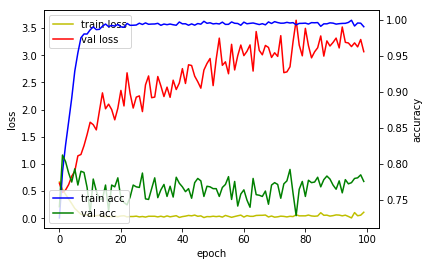

In [4]:
#실제 테스트 은하 분류, 100에포크, 실험데이터 1272개 ***

#0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

#랜덤시드 고정시키기
np.random.seed(3)

#1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'warehouse/final_galaxy2/train_galaxy',
        target_size=(50,50),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'warehouse/final_galaxy2/test_galaxy',
        target_size=(50,50),
        batch_size=3,
        shuffle=False,
        class_mode='categorical')

#2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=(50,50,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

#3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#4. 모델 학습시키기
hist=model.fit_generator(
        train_generator,
        steps_per_epoch=3411, #총 훈련 샘플 갯수 10233개, 배치사이즈 3 - 3411스텝
        epochs=100,
        validation_data=test_generator,
        validation_steps=400)   #총 검증 샘플 갯수 1200개, 배치사이즈 3 - 400스텝

#5. 모델 평가하기
print("--Evaluate--")
scores = model.evaluate_generator(test_generator, steps=400)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#6. 모델 사용하기
print("-- Predict --")
output = model.predict_generator(test_generator, steps=400)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)
print()
print('\n'.join(test_generator.filenames))

#7. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

Using TensorFlow backend.


Found 10233 images belonging to 3 classes.
Found 1200 images belonging to 3 classes.
Epoch 1/50
3411/3411 [==============================] - 1632s 478ms/step - loss: 0.6640 - acc: 0.7233 - val_loss: 0.5804 - val_acc: 0.7642
Epoch 2/50
3411/3411 [==============================] - 1586s 465ms/step - loss: 0.4868 - acc: 0.8120 - val_loss: 0.5600 - val_acc: 0.7867
Epoch 3/50
3411/3411 [==============================] - 1594s 467ms/step - loss: 0.3937 - acc: 0.8505 - val_loss: 0.5350 - val_acc: 0.8033
Epoch 4/50
3411/3411 [==============================] - 1680s 492ms/step - loss: 0.2919 - acc: 0.8884 - val_loss: 0.5468 - val_acc: 0.8208
Epoch 5/50
3411/3411 [==============================] - 1707s 500ms/step - loss: 0.1910 - acc: 0.9262 - val_loss: 0.7819 - val_acc: 0.7983
Epoch 6/50
3411/3411 [==============================] - 1602s 470ms/step - loss: 0.1132 - acc: 0.9595 - val_loss: 1.0800 - val_acc: 0.7900
Epoch 7/50
3411/3411 [==============================] - 1509s 443ms/step - loss: 

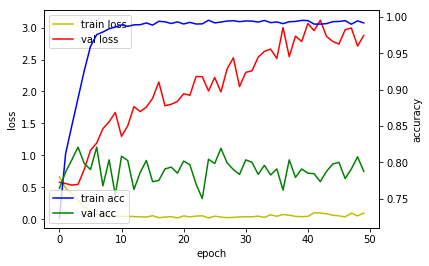

In [1]:
#실제 테스트 은하 분류, 50에포크, 실험데이터 1272개, 레이어추가 ***

#0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

#랜덤시드 고정시키기
np.random.seed(3)

#1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'warehouse/final_galaxy2/train_galaxy',
        target_size=(50,50),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'warehouse/final_galaxy2/test_galaxy',
        target_size=(50,50),
        batch_size=3,
        shuffle=False,
        class_mode='categorical')

#2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=(50,50,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

#3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#4. 모델 학습시키기
hist=model.fit_generator(
        train_generator,
        steps_per_epoch=3411, #총 훈련 샘플 갯수 10233개, 배치사이즈 3 - 3411스텝
        epochs=50,
        validation_data=test_generator,
        validation_steps=400)   #총 검증 샘플 갯수 1200개, 배치사이즈 3 - 400스텝

#5. 모델 평가하기
print("--Evaluate--")
scores = model.evaluate_generator(test_generator, steps=400)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#6. 모델 사용하기
print("-- Predict --")
output = model.predict_generator(test_generator, steps=400)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)
print()
print('\n'.join(test_generator.filenames))

#7. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()